Data wrangling is the process of cleaning, transforming, and organizing raw data into a structured format suitable for analysis and visualization. 

In this notebook, we will discuss how to perform basic data manipulations, such as filtering data rows that meet certain conditions, choosing data columns, and arranging data in ascending or descending order.

We will be working with the dataset `penguins` containing data on individual penguins on Antarctica.


In [344]:
import pandas as pd
import numpy as np

In [346]:
penguins = pd.read_csv('penguins.csv', header=0)


## Basics of Selecting Rows and Columns

 use `penguins.columns` to check the variable names.

In [350]:
penguins.columns

Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

or check a couple of row using .head() or .tail()

In [353]:
penguins.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


or check the number of rows and columns,  their data type and number of missing values using .info()

In [356]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


You can get the stat summary of quantitative variables using .describe()

In [359]:
penguins.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


Accessing the rows and columns of a data frame is similar, but not identical, to accessing the rows and columns of an array. 
Recall that the first argument to the `[]` method
is always applied to the rows of the array.  
Similarly, 
passing in a slice to the `[]` method creates a data frame whose *rows* are determined by the slice :

In [362]:
penguins[:3]

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


Similarly, an array of Booleans can be used to subset the rows:

In [365]:
female_idx = penguins['sex'] == 'female'
penguins[female_idx]

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
6,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
12,13,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female,2007
...,...,...,...,...,...,...,...,...,...
335,336,Chinstrap,Dream,45.6,19.4,194.0,3525.0,female,2009
337,338,Chinstrap,Dream,46.8,16.5,189.0,3650.0,female,2009
338,339,Chinstrap,Dream,45.7,17.0,195.0,3650.0,female,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009


However, if we pass in a list of strings to the [] method, then we obtain a data frame containing the corresponding set of columns.

In [368]:
penguins[['species', 'island']]

,species,island
0,Adelie,Torgersen
1,Adelie,Torgersen
2,Adelie,Torgersen
3,Adelie,Torgersen
4,Adelie,Torgersen
...,...,...
339,Chinstrap,Dream
340,Chinstrap,Dream
341,Chinstrap,Dream
342,Chinstrap,Dream


We can use the `set_index()` method to re-name the rows using the contents of `penguins['rowid']`. 

In [371]:
penguins_re = penguins.set_index('rowid')
penguins_re

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
rowid,,,,,,,,
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009


In [373]:
penguins_re.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

We see that the column `'rowid'` is no longer there.
 
Now that the index has been set to `rowid`, we can  access rows of the data 
frame by `rowid` using the `loc[]` method 

In [376]:
penguins_re.loc[1:5]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
rowid,,,,,,,,
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


As an alternative to using the index name, we could retrieve the first five rows of `penquins_re` using the `iloc[]` method:

In [379]:
penguins_re.iloc[:5]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
rowid,,,,,,,,
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


We can also use it to retrieve the 1st, 3rd and and 4th columns of `penguins_re` for first five rows:

In [382]:
penguins_re.iloc[:5,[0,2,3]]

,species,bill_length_mm,bill_depth_mm
rowid,,,
1,Adelie,39.1,18.7
2,Adelie,39.5,17.4
3,Adelie,40.3,18.0
4,Adelie,NaN,NaN
5,Adelie,36.7,19.3


Another example for multiple conditions

In [135]:
penguins_re.loc[1:5, ['species', 'bill_length_mm' ]]

,species,bill_length_mm
rowid,,
1,Adelie,39.1
2,Adelie,39.5
3,Adelie,40.3
4,Adelie,NaN
5,Adelie,36.7


In [58]:
new_idx = (penguins['body_mass_g'] > 3500) & (penguins['sex'] == 'female')
penguins.loc[new_idx, ['island','species']]

,island,species
1,Torgersen,Adelie
6,Torgersen,Adelie
15,Torgersen,Adelie
22,Biscoe,Adelie
25,Biscoe,Adelie
...,...,...
328,Dream,Chinstrap
335,Dream,Chinstrap
337,Dream,Chinstrap
338,Dream,Chinstrap


## Sorting Data

In [61]:
penguins.sort_values('flipper_length_mm')

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
28,29,Adelie,Biscoe,37.9,18.6,172.0,3150.0,female,2007
20,21,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female,2007
122,123,Adelie,Torgersen,40.2,17.0,176.0,3450.0,female,2009
30,31,Adelie,Dream,39.5,16.7,178.0,3250.0,female,2007
31,32,Adelie,Dream,37.2,18.1,178.0,3900.0,male,2007
...,...,...,...,...,...,...,...,...,...
185,186,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,male,2007
241,242,Gentoo,Biscoe,52.1,17.0,230.0,5550.0,male,2009
215,216,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,male,2008
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007


 Arranging in descending order

In [63]:
penguins.sort_values('flipper_length_mm', ascending= False)

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
215,216,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,male,2008
217,218,Gentoo,Biscoe,49.8,16.8,230.0,5700.0,male,2008
185,186,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,male,2007
227,228,Gentoo,Biscoe,48.6,16.0,230.0,5800.0,male,2008
241,242,Gentoo,Biscoe,52.1,17.0,230.0,5550.0,male,2009
...,...,...,...,...,...,...,...,...,...
122,123,Adelie,Torgersen,40.2,17.0,176.0,3450.0,female,2009
20,21,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female,2007
28,29,Adelie,Biscoe,37.9,18.6,172.0,3150.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007


## Counting

In [65]:
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [67]:
count_peng = penguins[['species', 'island', 'sex']].value_counts()

In [69]:
count_peng

species    island     sex   
Gentoo     Biscoe     male      61
                      female    58
Chinstrap  Dream      female    34
                      male      34
Adelie     Dream      male      28
                      female    27
           Torgersen  female    24
                      male      23
           Biscoe     female    22
                      male      22
Name: count, dtype: int64

In [71]:
count_peng.info()

<class 'pandas.core.series.Series'>
MultiIndex: 10 entries, ('Gentoo', 'Biscoe', 'male') to ('Adelie', 'Biscoe', 'male')
Series name: count
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 421.0+ bytes


In [73]:
count_peng = count_peng.reset_index().rename(columns={0: "count"})

In [75]:
count_peng

,species,island,sex,count
0,Gentoo,Biscoe,male,61
1,Gentoo,Biscoe,female,58
2,Chinstrap,Dream,female,34
3,Chinstrap,Dream,male,34
4,Adelie,Dream,male,28
5,Adelie,Dream,female,27
6,Adelie,Torgersen,female,24
7,Adelie,Torgersen,male,23
8,Adelie,Biscoe,female,22
9,Adelie,Biscoe,male,22


## Grouping

In many data analysis settings, we want to break a dataset into subsets and then perform some summary calculation on each subset. The simplest example is counting, which we have done previously with the `.value_counts()`

In [77]:
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

The function `.value_counts()` here does all the work for us, but what if instead of counting we wanted to calculate the mean weight of the penguins for each species, or calculate the mean weight and count at the same time? We need a general framework that allows us to do these kinds of calculations with maximum flexibility.

The pandas approach is to first group a dataset with `.groupby()` and then to calculate grouped summaries with various methods.

In [80]:
penguins.groupby('species')

In [82]:
penguins.groupby('species').count()

,rowid,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
species,,,,,,,,
Adelie,152,152,151,151,151,151,146,152
Chinstrap,68,68,68,68,68,68,68,68
Gentoo,124,124,123,123,123,123,119,124


In [84]:
penguins.groupby('species')['rowid'].count()

species
Adelie       152
Chinstrap     68
Gentoo       124
Name: rowid, dtype: int64

In [27]:
penguins.groupby('species').count().rowid

species
Adelie       152
Chinstrap     68
Gentoo       124
Name: rowid, dtype: int64

In [145]:
penguins.groupby('species')[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].agg('mean')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


In [106]:
penguins.groupby(['species', 'island']).count().rowid

species    island   
Adelie     Biscoe        44
           Dream         56
           Torgersen     52
Chinstrap  Dream         68
Gentoo     Biscoe       124
Name: rowid, dtype: int64

In [110]:
penguins.groupby(['species', 'island', 'sex'])[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].agg('mean')

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   island    sex                                                        
Adelie    Biscoe    female       37.359091      17.704545         187.181818   
                    male         40.590909      19.036364         190.409091   
          Dream     female       36.911111      17.618519         187.851852   
                    male         40.071429      18.839286         191.928571   
          Torgersen female       37.554167      17.550000         188.291667   
                    male         40.586957      19.391304         194.913043   
Chinstrap Dream     female       46.573529      17.588235         191.735294   
                    male         51.094118      19.252941         199.911765   
Gentoo    Biscoe    female       45.563793      14.237931         212.706897   
                    male         49.473770      15.718033         221.540984   

                            body_mass_g  
species   island    sex                  
Adelie    Biscoe    female  3369.318182  
                    male    4050.000000  
          Dream     female  3344.444444  
                    male    4045.535714  
          Torgersen female  3395.833333  
                    male    4034.782609  
Chinstrap Dream     female  3527.205882  
                    male    3938.970588  
Gentoo    Biscoe    female  4679.741379  
                    male    5484.836066

In [114]:
penguins.groupby(['species', 'island', 'sex'])[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].agg(["mean", "median","max"])

bill_length_mm              bill_depth_mm         \
                                     mean median   max          mean median   
species   island    sex                                                       
Adelie    Biscoe    female      37.359091  37.75  40.5     17.704545  17.70   
                    male        40.590909  40.80  45.6     19.036364  18.90   
          Dream     female      36.911111  36.80  42.2     17.618519  17.80   
                    male        40.071429  40.25  44.1     18.839286  18.65   
          Torgersen female      37.554167  37.60  41.1     17.550000  17.45   
                    male        40.586957  41.10  46.0     19.391304  19.20   
Chinstrap Dream     female      46.573529  46.30  58.0     17.588235  17.65   
                    male        51.094118  50.95  55.8     19.252941  19.30   
Gentoo    Biscoe    female      45.563793  45.50  50.5     14.237931  14.25   
                    male        49.473770  49.50  59.6     15.718033  15.70   

                                 flipper_length_mm                body_mass_g  \
                             max              mean median    max         mean   
species   island    sex                                                         
Adelie    Biscoe    female  20.7        187.181818  187.0  199.0  3369.318182   
                    male    21.1        190.409091  191.0  203.0  4050.000000   
          Dream     female  19.3        187.851852  188.0  202.0  3344.444444   
                    male    21.2        191.928571  190.5  208.0  4045.535714   
          Torgersen female  19.3        188.291667  189.0  196.0  3395.833333   
                    male    21.5        194.913043  195.0  210.0  4034.782609   
Chinstrap Dream     female  19.4        191.735294  192.0  202.0  3527.205882   
                    male    20.8        199.911765  200.5  212.0  3938.970588   
Gentoo    Biscoe    female  15.5        212.706897  212.0  222.0  4679.741379   
                    male    17.3        221.540984  221.0  231.0  5484.836066   

                                            
                            median     max  
species   island    sex                     
Adelie    Biscoe    female  3375.0  3900.0  
                    male    4000.0  4775.0  
          Dream     female  3400.0  3700.0  
                    male    3987.5  4650.0  
          Torgersen female  3400.0  3800.0  
                    male    4000.0  4700.0  
Chinstrap Dream     female  3550.0  4150.0  
                    male    3950.0  4800.0  
Gentoo    Biscoe    female  4700.0  5200.0  
                    male    5500.0  6300.0

In [173]:
ncbirth = pd.read_csv('NCbirths.csv', header=0)

You can find the metadata here: https://rdrr.io/cran/Stat2Data/man/NCbirths.html

In [175]:
ncbirth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1450 non-null   int64  
 1   Plural         1450 non-null   int64  
 2   Sex            1450 non-null   int64  
 3   MomAge         1450 non-null   int64  
 4   Weeks          1450 non-null   int64  
 5   Marital        1450 non-null   int64  
 6   RaceMom        1450 non-null   int64  
 7   HispMom        1450 non-null   object 
 8   Gained         1410 non-null   float64
 9   Smoke          1445 non-null   float64
 10  BirthWeightOz  1450 non-null   int64  
 11  BirthWeightGm  1450 non-null   float64
 12  Low            1450 non-null   int64  
 13  Premie         1450 non-null   int64  
 14  MomRace        1450 non-null   object 
dtypes: float64(3), int64(10), object(2)
memory usage: 170.1+ KB


In [177]:
ncbirth.head()

,ID,Plural,Sex,MomAge,Weeks,Marital,RaceMom,HispMom,Gained,Smoke,BirthWeightOz,BirthWeightGm,Low,Premie,MomRace
0,1,1,1,32,40,1,1,N,38.0,0.0,111,3146.85,0,0,white
1,2,1,2,32,37,1,1,N,34.0,0.0,116,3288.60,0,0,white
2,3,1,1,27,39,1,1,N,12.0,0.0,138,3912.30,0,0,white
3,4,1,1,27,39,1,1,N,15.0,0.0,136,3855.60,0,0,white
4,5,1,1,25,39,1,1,N,32.0,0.0,121,3430.35,0,0,white


In [196]:
ncbirth['Premie'].unique()

array([0, 1])

Class activity 1: create a dataframe with the youngest and oldest mothers in each race category (use MomRace)

In [211]:
ncbirth.groupby('MomRace').agg(['min', 'max'])['MomAge']

,min,max
MomRace,,
black,13,43
hispanic,15,41
other,16,40
white,13,43


In [395]:
ncbirth.groupby('MomRace')['MomAge'].agg(['min', 'max'])

,min,max
MomRace,,
black,13,43
hispanic,15,41
other,16,40
white,13,43


Class activity 2: Find the total number of premature births (Gestation < 37 weeks) per smoker group

In [200]:
ncbirth.groupby('Smoke')['Premie'].sum()

Smoke
0.0    157
1.0     34
Name: Premie, dtype: int64

Class activity 3: Average birth weight per race group (use RaceMom)

In [214]:
ncbirth.groupby('RaceMom')['BirthWeightGm'].mean()

RaceMom
1    3341.670199
2    3134.468223
3    3269.270455
4    3572.100000
5    3359.993598
7    2749.950000
8    3373.650000
Name: BirthWeightGm, dtype: float64

class activity 4: Analyze the average gained Per race (MomRace) and Smoker group

In [220]:
ncbirth.groupby(['MomRace', 'Smoke'])['Gained'].mean()

MomRace   Smoke
black     0.0      28.397887
          1.0      30.853659
hispanic  0.0      26.834437
          1.0      31.000000
other     0.0      33.341463
          1.0      40.166667
white     0.0      32.042641
          1.0      30.284810
Name: Gained, dtype: float64

## Combining Data Frames

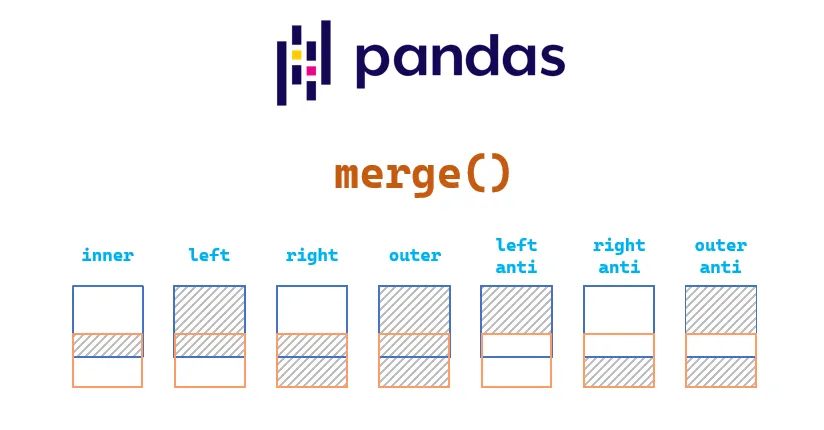

In [227]:
df_scores = pd.DataFrame({
    "id": ["1003", "1004", "1005", "1006", "1007"],
    "gender": ["M", "M", "F", "M", "M"],
    "subject": ["Math", "Art", "Engilish", "Physics", "Music"],
    "score": [85, 78, 88, 90, 80]
})
df_scores

,id,gender,subject,score
0,1003,M,Math,85
1,1004,M,Art,78
2,1005,F,Engilish,88
3,1006,M,Physics,90
4,1007,M,Music,80


In [229]:
df_students = pd.DataFrame({
    "id": ["1001", "1002", "1003", "1004", "1005"],
    "first_name": ["John", "Sarah", "Mike", "Tom", "Mary"],
    "last_name": ["Doe", "Smith", "Brown", "Davis", "Clark"],
    "gender": ["M", "F", "M", "M", "F"]
})
df_students

,id,first_name,last_name,gender
0,1001,John,Doe,M
1,1002,Sarah,Smith,F
2,1003,Mike,Brown,M
3,1004,Tom,Davis,M
4,1005,Mary,Clark,F


In [233]:
pd.merge(df_students, df_scores, how='inner', on="id")

,id,first_name,last_name,gender_x,gender_y,subject,score
0,1003,Mike,Brown,M,M,Math,85
1,1004,Tom,Davis,M,M,Art,78
2,1005,Mary,Clark,F,F,Engilish,88


In [235]:
pd.merge(df_scores, df_students, how='left', on="id")

,id,gender_x,subject,score,first_name,last_name,gender_y
0,1003,M,Math,85,Mike,Brown,M
1,1004,M,Art,78,Tom,Davis,M
2,1005,F,Engilish,88,Mary,Clark,F
3,1006,M,Physics,90,NaN,NaN,NaN
4,1007,M,Music,80,NaN,NaN,NaN


In [237]:
pd.merge(df_scores, df_students, how='right', on="id")

,id,gender_x,subject,score,first_name,last_name,gender_y
0,1001,NaN,NaN,NaN,John,Doe,M
1,1002,NaN,NaN,NaN,Sarah,Smith,F
2,1003,M,Math,85.0,Mike,Brown,M
3,1004,M,Art,78.0,Tom,Davis,M
4,1005,F,Engilish,88.0,Mary,Clark,F


In [239]:
pd.merge(df_scores, df_students, how='outer', on="id")


,id,gender_x,subject,score,first_name,last_name,gender_y
0,1001,NaN,NaN,NaN,John,Doe,M
1,1002,NaN,NaN,NaN,Sarah,Smith,F
2,1003,M,Math,85.0,Mike,Brown,M
3,1004,M,Art,78.0,Tom,Davis,M
4,1005,F,Engilish,88.0,Mary,Clark,F
5,1006,M,Physics,90.0,NaN,NaN,NaN
6,1007,M,Music,80.0,NaN,NaN,NaN


In [247]:
#Left anti
df_scores[~df_scores['id'].isin(df_students['id'])]

,id,gender,subject,score
3,1006,M,Physics,90
4,1007,M,Music,80


In [251]:
#right anti
df_students[~df_students['id'].isin(df_scores['id'])]

,id,first_name,last_name,gender
0,1001,John,Doe,M
1,1002,Sarah,Smith,F


In [257]:

common_ids = df_scores.merge(df_students, on='id', how='inner')['id']

# Perform an outer anti join: Select rows that exist only in one of the two dataframes
df_anti_join = pd.merge(df_scores, df_students, how='outer', on="id")
df_anti_join = df_anti_join[~df_anti_join['id'].isin(common_ids)]

In [259]:
df_anti_join

,id,gender_x,subject,score,first_name,last_name,gender_y
0,1001,NaN,NaN,NaN,John,Doe,M
1,1002,NaN,NaN,NaN,Sarah,Smith,F
5,1006,M,Physics,90.0,NaN,NaN,NaN
6,1007,M,Music,80.0,NaN,NaN,NaN


## Missing Values Treatment

In [262]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [270]:
penguins.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [274]:
#pip install missingno

Note: you may need to restart the kernel to use updated packages.


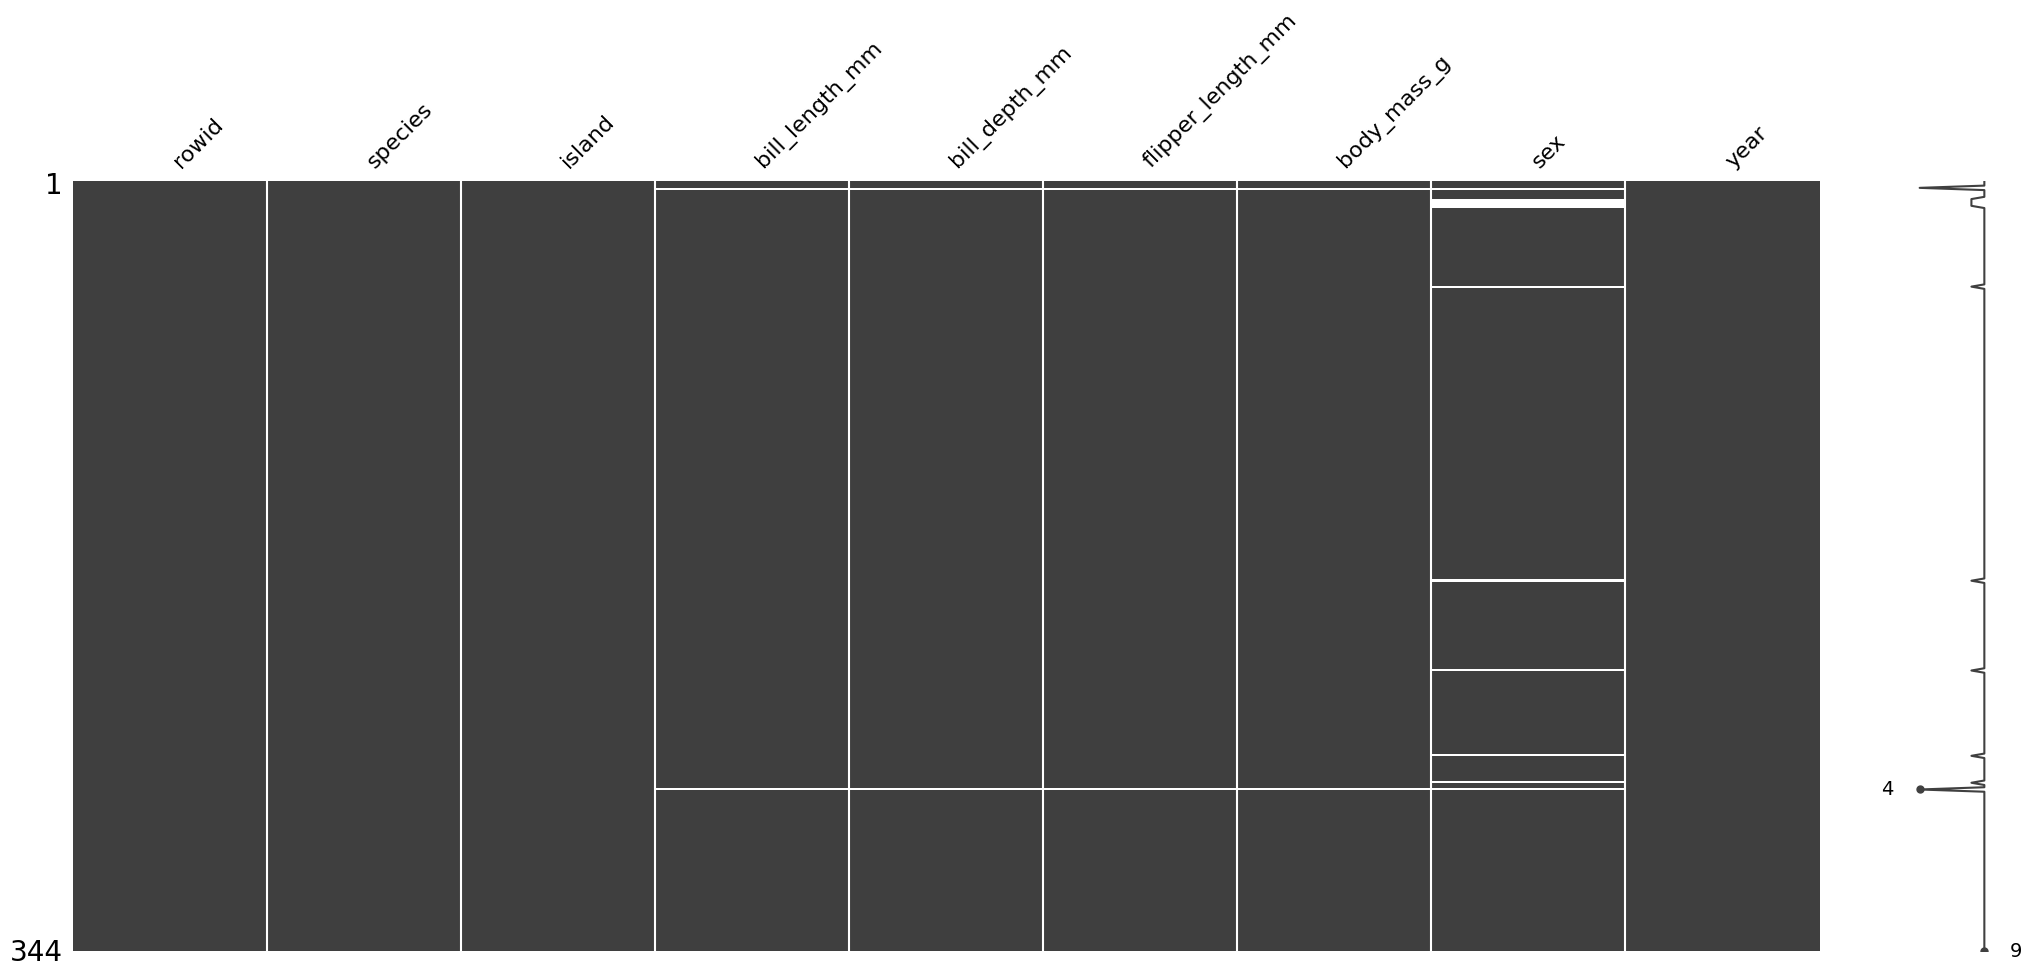

In [276]:
import missingno as msno 
msno.matrix(penguins);

In [278]:
retail = pd.read_csv('online_retail_II.csv', header=0)

In [280]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [282]:
retail.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

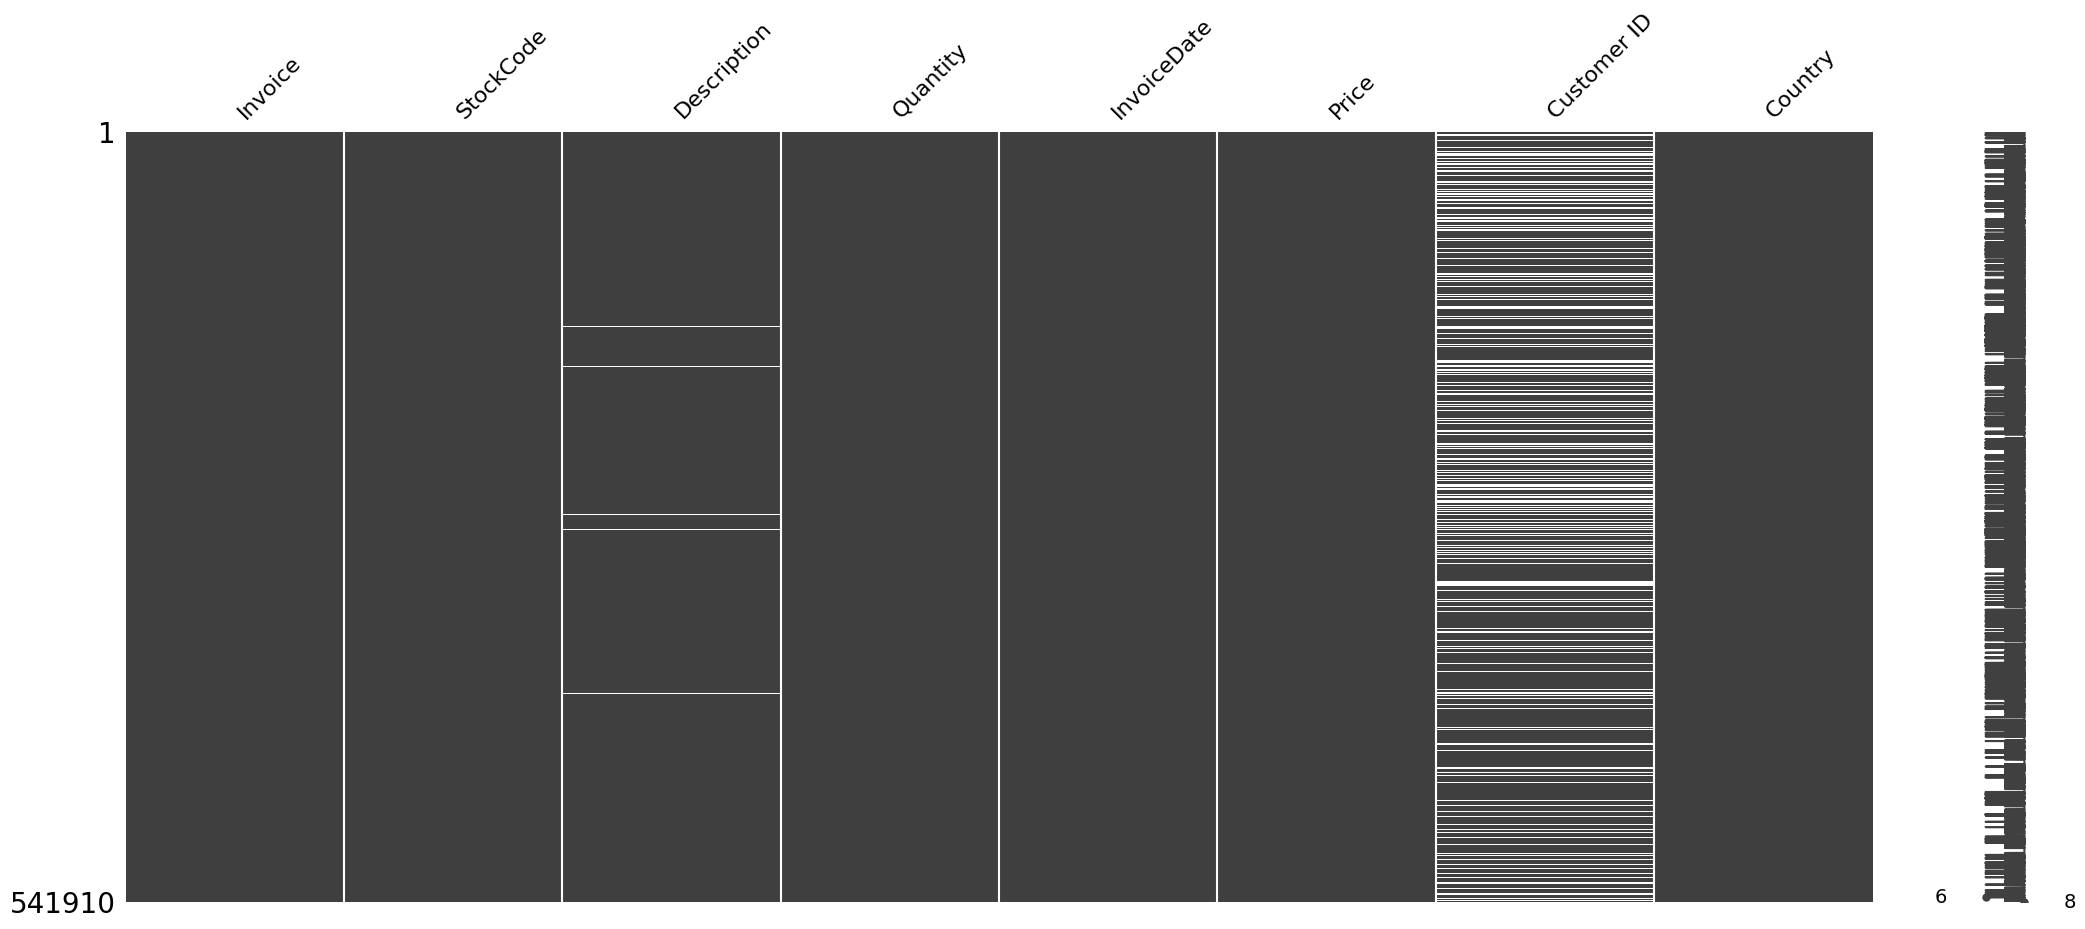

In [284]:
import missingno as msno 
msno.matrix(retail);

In [286]:
retail_missing_removed = retail.dropna()

In [288]:
retail_missing_removed.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [290]:
removed_all = retail.dropna(how = 'all')

In [292]:
removed_all.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [53]:
removed_any = retail.dropna(how = 'any')

In [57]:
removed_any.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [63]:
removed_any.shape

(406830, 8)

In [296]:
removed_column = retail.dropna(axis= 1, how = 'any')

In [298]:
removed_column.isnull().sum()

Invoice        0
StockCode      0
Quantity       0
InvoiceDate    0
Price          0
Country        0
dtype: int64

In [300]:
removed_column.shape

(541910, 6)

In [302]:
thresh = retail.shape[0]*0.9

In [304]:
removed_column = retail.dropna(axis= 1, thresh = thresh)

In [306]:
removed_column.isnull().sum()

Invoice           0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
Price             0
Country           0
dtype: int64

In [308]:
removed_column.shape

(541910, 7)

In [69]:
ors_fill_na_with_0 = retail.fillna(0)

## Data Imputation

In [310]:
titanic_df = pd.read_csv ('titanic.csv')

In [312]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [314]:
Age_mean = titanic_df['Age'].mean()

In [316]:
Age_mean

29.69911764705882

In [318]:
titanic_df['Age (na_by_mean)'] = titanic_df['Age'].fillna(Age_mean)

In [320]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               714 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin             204 non-null    object 
 11  Embarked          889 non-null    object 
 12  Age (na_by_mean)  891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [326]:
titanic_df['Age (na_by_ffill)'] = titanic_df['Age'].ffill()

In [328]:
titanic_df['Age (na_by_fback)'] = titanic_df['Age'].bfill()

 Imputing categorical data

In [330]:
most_frequent = titanic_df['Cabin'].value_counts().index[0]

In [332]:
titanic_df['cabin(na_filled)'] = titanic_df['Cabin'].fillna(most_frequent )

In [334]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Cabin              204 non-null    object 
 11  Embarked           889 non-null    object 
 12  Age (na_by_mean)   891 non-null    float64
 13  Age (na_by_ffill)  891 non-null    float64
 14  Age (na_by_fback)  891 non-null    float64
 15  cabin(na_filled)   891 non-null    object 
dtypes: float64(5), int64(5), o